
# ML-Workshop
## Data Exploration & House price prediction
Dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

## Load the data from .csv

In [1]:
import pandas as pd
import missingno
from sklearn.metrics import mutual_info_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

# | remove max column restriction for printing DataFrames (default=20)
pd.options.display.max_columns = None 

data_path = 'data/house_prices.csv'

df = pd.read_csv(data_path, index_col='Id')

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Missing values (NaN)

### Find NaN values 

There are some colums where almost all values are missing - these should be removed. <br>
In the barplot, we see only the absolute count of the non-missing values. Using missingno.matrix(), we can also identify the position of the missing values in the dataframe.

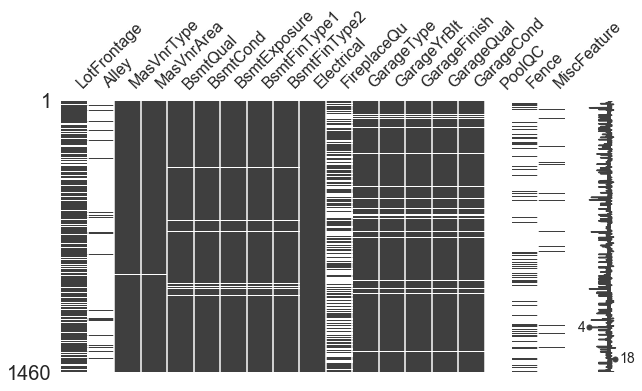

In [2]:
# | get names of columns where values are missing - Method A
sr_counts = df.count()
nan_colnames = sr_counts[sr_counts < len(df)].index

# | get names of columns where values are missing - Method B
sr_isna = df.isna().any()
nan_colnames = sr_isna[sr_isna == True].index

# | plot missing values only of columns where values are missing
missingno.matrix(df[nan_colnames], figsize=(10,5))

### Remove/Replace the NaN Values

In [3]:
# | drop all columns where more than 90% of the values are N/A
df = df.dropna(axis=1, thresh=int(0.9*df.shape[0]))

# | check how many of the remaining rows have at least one NaN value
nr_nan_rows = len(df) - len(df.dropna())
print("{0} of {1} ({2:.2f}%) rows still have NaN values".format(nr_nan_rows, len(df), nr_nan_rows*100/len(df)))

122 of 1460 (8.36%) rows still have NaN values


Now we have two options: <br>
- A: remove all rows that have at least one missing value
- B: replace the Nan values e.g. by the mean (for numerical) or the most frequent value (for categorical) of the corresponding column

In [4]:
# | A: remove all rows that have at least one missing value
df = df.dropna()

# | B: replace the Nan values by the mean (for numerical) or the most frequent value (for categorical)
# df_num = df_num.fillna(df_num.mean())
# df_cat = df_num.fillna(df_num.mode())

### Calculate statistics such as mean, std & percentiles

In [5]:
# this ignores the non-numerical columns
df.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,56.136024,10706.294469,6.219731,5.596413,1973.029148,1985.668909,110.360239,464.234679,49.218236,582.494768,1095.947683,1176.221973,357.141256,4.221973,1537.585202,0.438714,0.060538,1.575486,0.402840,2.864723,1.029895,6.550075,0.648729,1978.596413,1.87145,501.449925,99.384903,47.782511,21.263827,3.585949,16.43423,3.010463,42.932735,6.331839,2007.805680,186761.782511
std,41.252576,10336.621126,1.324472,1.078124,29.563540,20.296463,185.604816,458.792420,166.196584,439.950528,405.554435,386.644986,440.324982,40.712916,520.579960,0.515630,0.241685,0.547570,0.504185,0.776677,0.174697,1.585071,0.645393,24.773741,0.63428,186.761863,127.537065,65.362562,60.843964,30.224622,58.05159,41.961337,508.056255,2.699437,1.330691,78913.847668
min,20.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.00000,160.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,7744.000000,5.000000,5.000000,1956.000000,1968.000000,0.000000,0.000000,0.000000,248.000000,819.750000,894.000000,0.000000,0.000000,1160.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.00000,377.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.000000,2007.000000,135000.000000
50%,50.000000,9600.000000,6.000000,5.000000,1976.000000,1994.500000,0.000000,413.000000,0.000000,489.000000,1021.500000,1098.000000,0.000000,0.000000,1480.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.00000,484.000000,6.000000,28.000000,0.000000,0.000000,0.00000,0.000000,0.000000,6.000000,2008.000000,168500.000000
75%,70.000000,11760.750000,7.000000,6.000000,2001.000000,2004.000000,174.000000,733.000000,0.000000,815.750000,1324.000000,1414.000000,740.500000,0.000000,1791.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.00000,583.000000,174.500000,70.000000,0.000000,0.000000,0.00000,0.000000,0.000000,8.000000,2009.000000,220000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,2.000000,2.000000,3.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.00000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.00000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Separate categorical and numerical columns 

Nominal and numerical values cannot be analysed in the same way ...

In [6]:
df.dtypes.value_counts()

object     38
int64      34
float64     2
dtype: int64

In [7]:
df_cat = df.select_dtypes(include='object')
df_num = df.select_dtypes(exclude='object')

df_num.columns.tolist()

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

## Analyse distributions

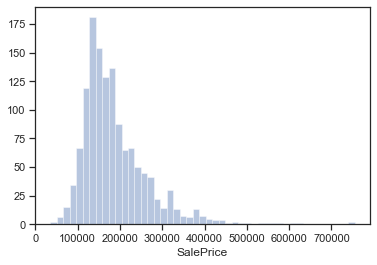

In [8]:
fig, ax = plt.subplots()
sns.distplot(df_num['SalePrice'], kde=False, ax=ax)
# df_num['SalePrice'].plot.hist()

#fig2, axs = plt.subplots(1,2)
#axs[0]

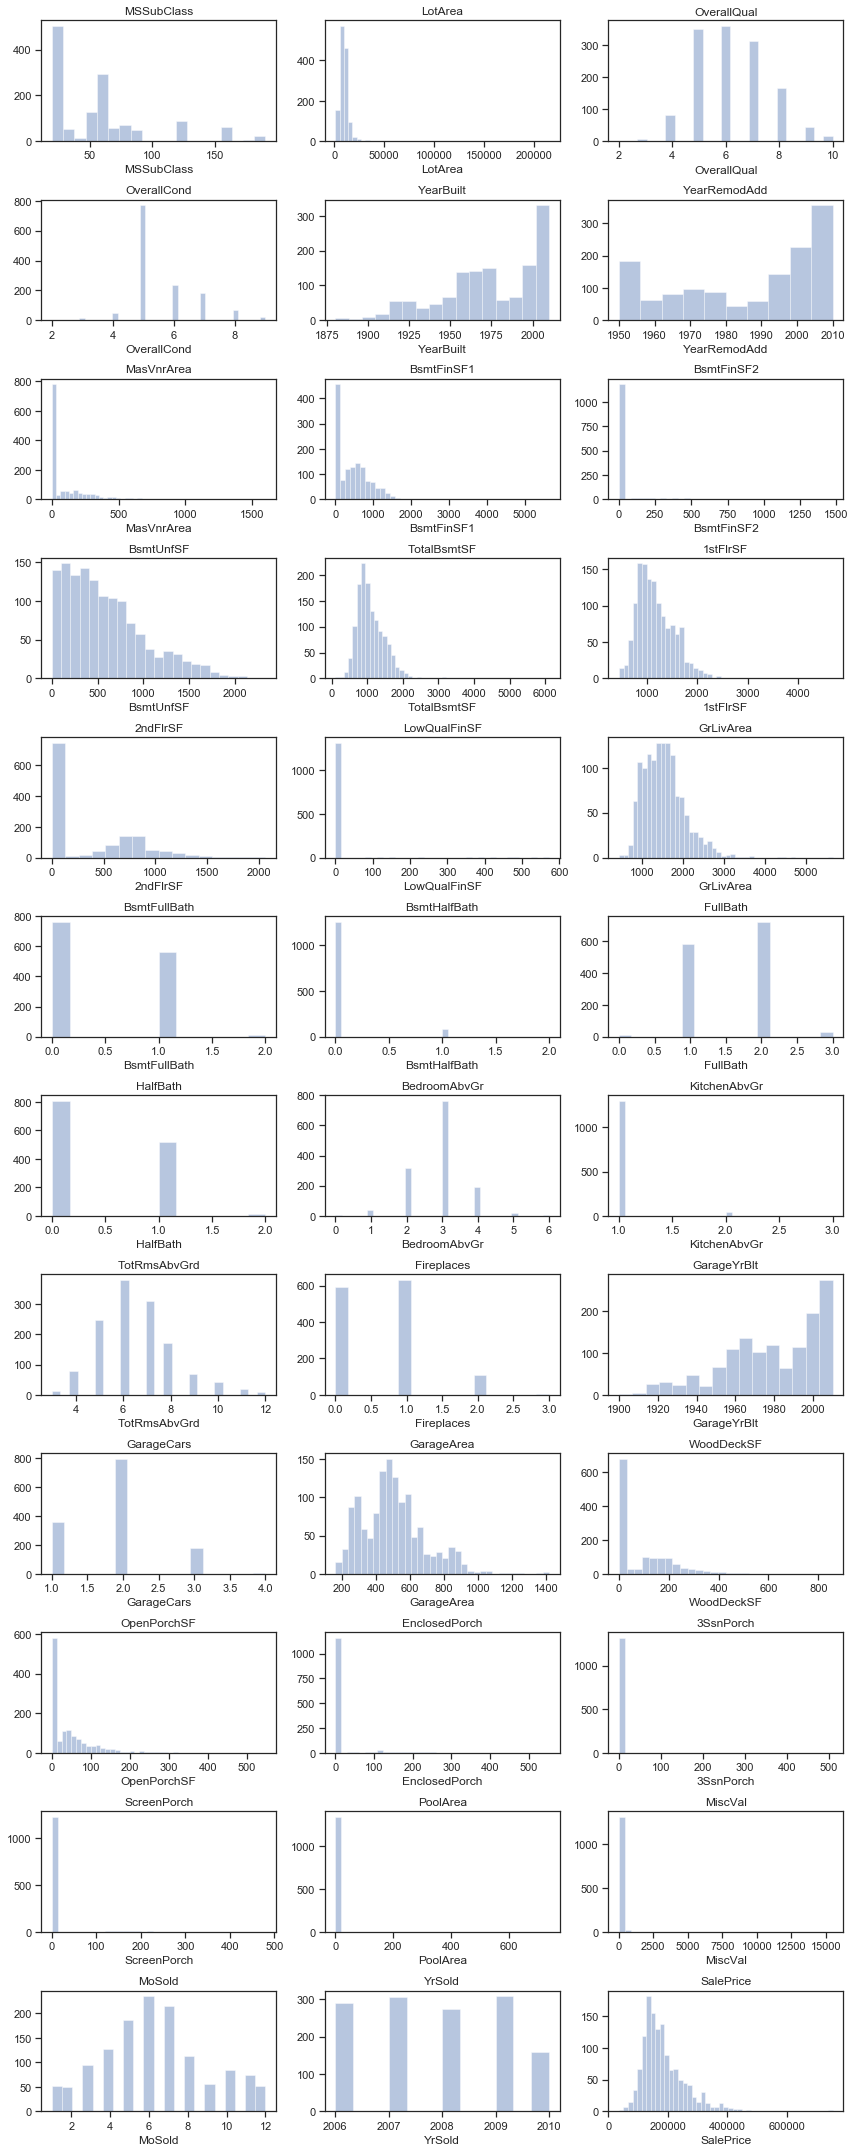

In [9]:
fig, axes = plt.subplots(round(len(df_num.columns) / 3), 3, figsize=(12, 30))


for i, ax in enumerate(fig.axes):
    if i < len(df_num.columns):
        sns.distplot(df_num.iloc[:,i], kde=False, ax=ax)
        ax.set_title(df_num.columns[i])

plt.tight_layout()        

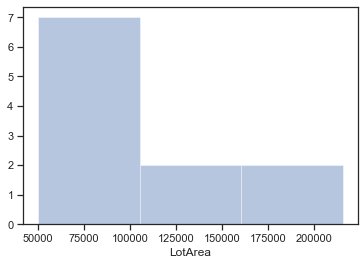

In [10]:
sns.distplot(df_num.loc[df_num['LotArea'] > 50000, 'LotArea'], kde=False)

# plt.figure()
# df_num.loc[df_num['LotArea'] > 50000, 'LotArea'].plot.hist()
# df_num.loc[df_num['LotArea'] > 50000, 'LotArea'].plot.hist(bins=3)

## Correlation analysis of numerical features

### Correlation between features and target 

In [11]:
# | get highest correlations between features and target variable 'SalePrice'
sr_corr = df_num.corr()['SalePrice']
sr_corr = sr_corr[sr_corr.abs() > 0.5].sort_values(ascending=False)

# | delete correlation of target with itself
del sr_corr['SalePrice']

top_corr_columns = sr_corr.index

sr_corr

OverallQual     0.783546
GrLivArea       0.711706
GarageCars      0.640154
GarageArea      0.607535
1stFlrSF        0.604714
TotalBsmtSF     0.602042
FullBath        0.569313
TotRmsAbvGrd    0.551821
YearBuilt       0.504297
YearRemodAdd    0.501435
Name: SalePrice, dtype: float64

Now lets look more in detail at the relationship of the most correlating feature to the target


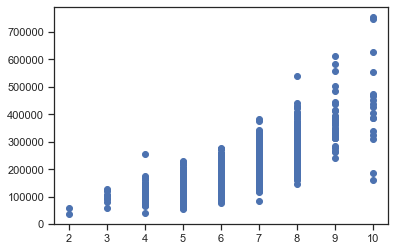

In [12]:
plt.scatter(df_num[top_corr_columns[0]], df_num['SalePrice'])

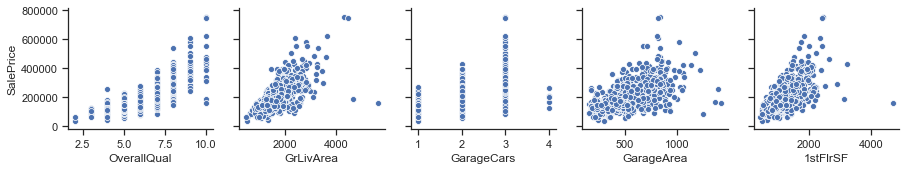

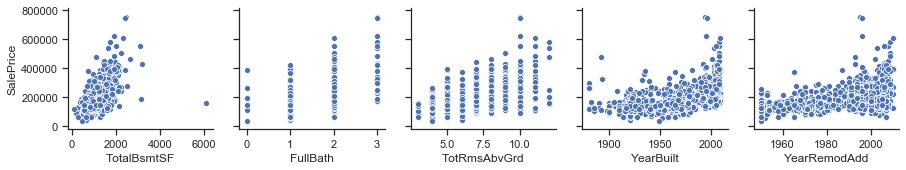

In [13]:
# sns.pairplot(data=df_num)
# | for loop to print only 5 plots per line
for i in range(0, len(top_corr_columns), 5):
    sns.pairplot(data=df_num, x_vars=top_corr_columns[i:i+5], y_vars=['SalePrice'])

Some examples of what we can deduce from these illustrations: <br>
- <strong>OverallQual</strong>: Overall material and finish quality <br>
It makes sense that houses built with better materials are more expensive.
- <strong>GrLivArea</strong>: Above grade (ground) living area square feet <br>
It makes sense that bigger houses tend to be more expensive.
- <strong>YearBuilt</strong> <br>
Of course, newer houses also tendo to be more expensive, as they're in better condition / lower renovation costs.

Let's have a look at the remaining features, with lower correlations:

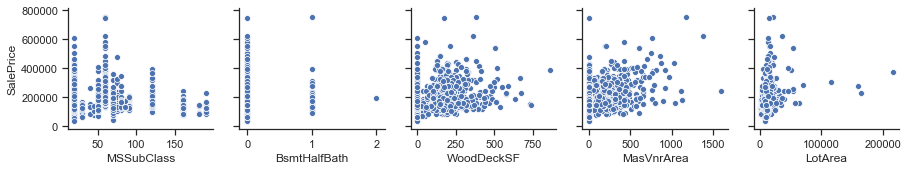

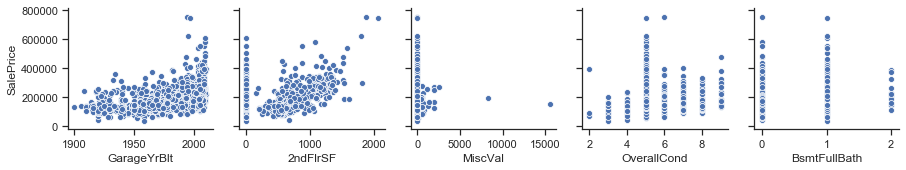

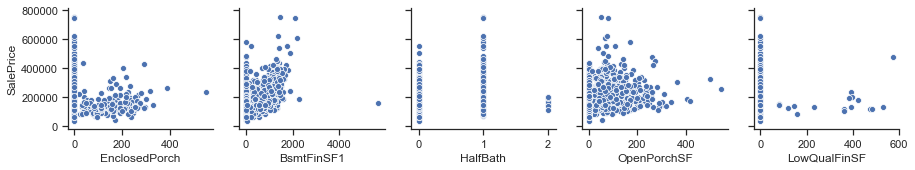

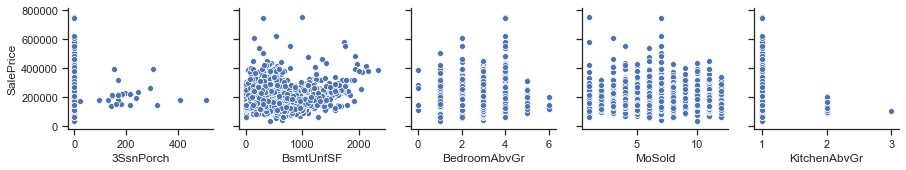

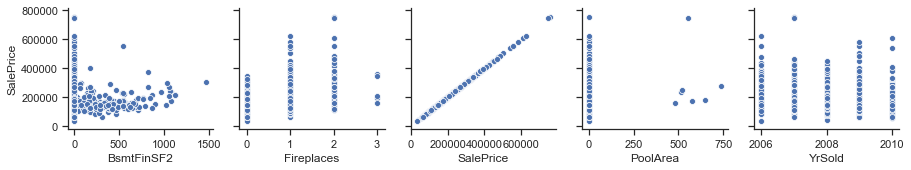

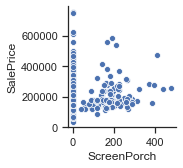

In [14]:
remaining_num_cols = list(set(df_num.columns) - set(top_corr_columns))

# | for loop to print only 5 plots per line
for i in range(0, len(remaining_num_cols), 5):
    sns.pairplot(data=df_num, x_vars=remaining_num_cols[i:i+5], y_vars=['SalePrice'])

If we look closely at the data we can see that a lot of data points are located on x = 0 which may indicate the absence of such feature in the house. For example not all houses have a bathroom in the basement, a 2nd floor or a torch. <br>
<strong>2ndFlrSF</strong> actually seems to correlate quite strongly with the Sales Prices, except for those 0-values, leading to a much lower correlation value, than when ignoring these values. Same holds true for <strong>BsmntFinSF1</strong>, not all houses have a basement, but those with big basements of course tend to be more expensive.

#### What about non-linear relationships?
Pearson correlation only captures linear relationships between two vectors. Metrics such as Mutual Information (MI) also measure non-linear relationships.

In [15]:
mi_scores_dict = dict()

for col_name in df_num:
    if col_name == 'SalePrice':
        continue
    mi_score = mutual_info_score(df_num[col_name], df['SalePrice'])
    mi_scores_dict[col_name] = mi_score
    
sr_mi_scores = pd.Series(list(mi_scores_dict.values()), index=mi_scores_dict.keys())

sr_mi_scores.sort_values(ascending=False)

LotArea          5.551156
GrLivArea        5.384034
1stFlrSF         5.244159
BsmtUnfSF        5.226045
TotalBsmtSF      5.137296
GarageArea       4.368888
BsmtFinSF1       4.052416
YearBuilt        3.231548
GarageYrBlt      3.150849
OpenPorchSF      2.712865
YearRemodAdd     2.680695
2ndFlrSF         2.581182
WoodDeckSF       2.484165
MasVnrArea       2.479276
MoSold           1.441082
MSSubClass       1.245427
TotRmsAbvGrd     1.165506
OverallQual      1.144497
YrSold           0.863844
EnclosedPorch    0.753707
BsmtFinSF2       0.725426
OverallCond      0.722374
BedroomAbvGr     0.669208
GarageCars       0.665646
FullBath         0.560401
Fireplaces       0.546942
ScreenPorch      0.496686
HalfBath         0.381025
BsmtFullBath     0.348824
MiscVal          0.175989
BsmtHalfBath     0.127475
3SsnPorch        0.102272
LowQualFinSF     0.084559
KitchenAbvGr     0.081941
PoolArea         0.031962
dtype: float64

The first 9 values have relatively high MI scores, look at these and check if one of these didn't have high pearson correlation.

In [16]:
# get names of top-9 MI columns 
top_mi_columns = sr_mi_scores.nlargest(9).index

set(top_mi_columns).difference(set(top_corr_columns))

{'BsmtFinSF1', 'BsmtUnfSF', 'GarageYrBlt', 'LotArea'}

Indeed we found 4 columns with high MI but low Pearson Correlation scores. Looking at the scatter plots above <strong>BsmtFinSF1</strong> actually seemed to have high correlation, but the correlation score was degraded by the 0-values (as explained above). Another interesting case is <strong>LotArea</strong> (look at scatter plot).

In [17]:
top_corr_columns

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', '1stFlrSF',
       'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd'],
      dtype='object')

### Correlation between features

Find features holding redundant information

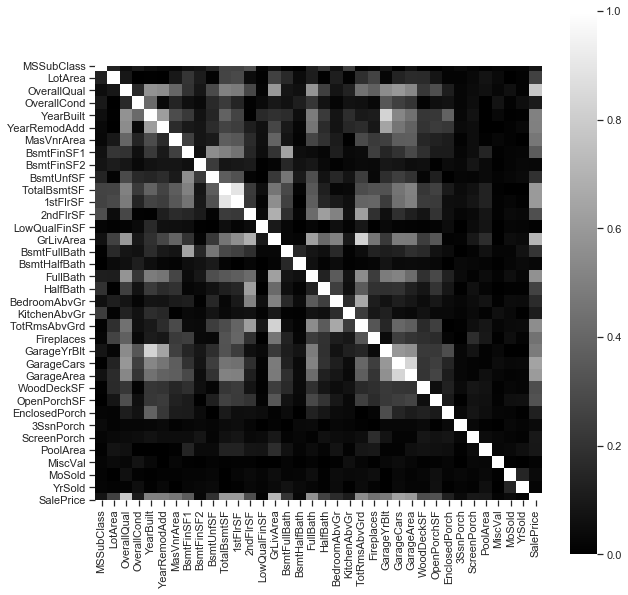

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
sns.heatmap(df_num.corr().abs(), square=True, cmap='gray', vmin=0, vmax=1, xticklabels=True, yticklabels=True)
# | to ensure all columns are visible, you have to set the parameters xticklabels, yticklabels to True

Not how the Garage features correlate with each other, or the GarageYrBlt with the YearBuilt feature etc. 

## Analysis of categorical features

Note that we cannot apply the same analysis to the categorical columns, as correlation and mutual information are only defined for numerical values.

### Visualize frequencies/distribution of the nominal values

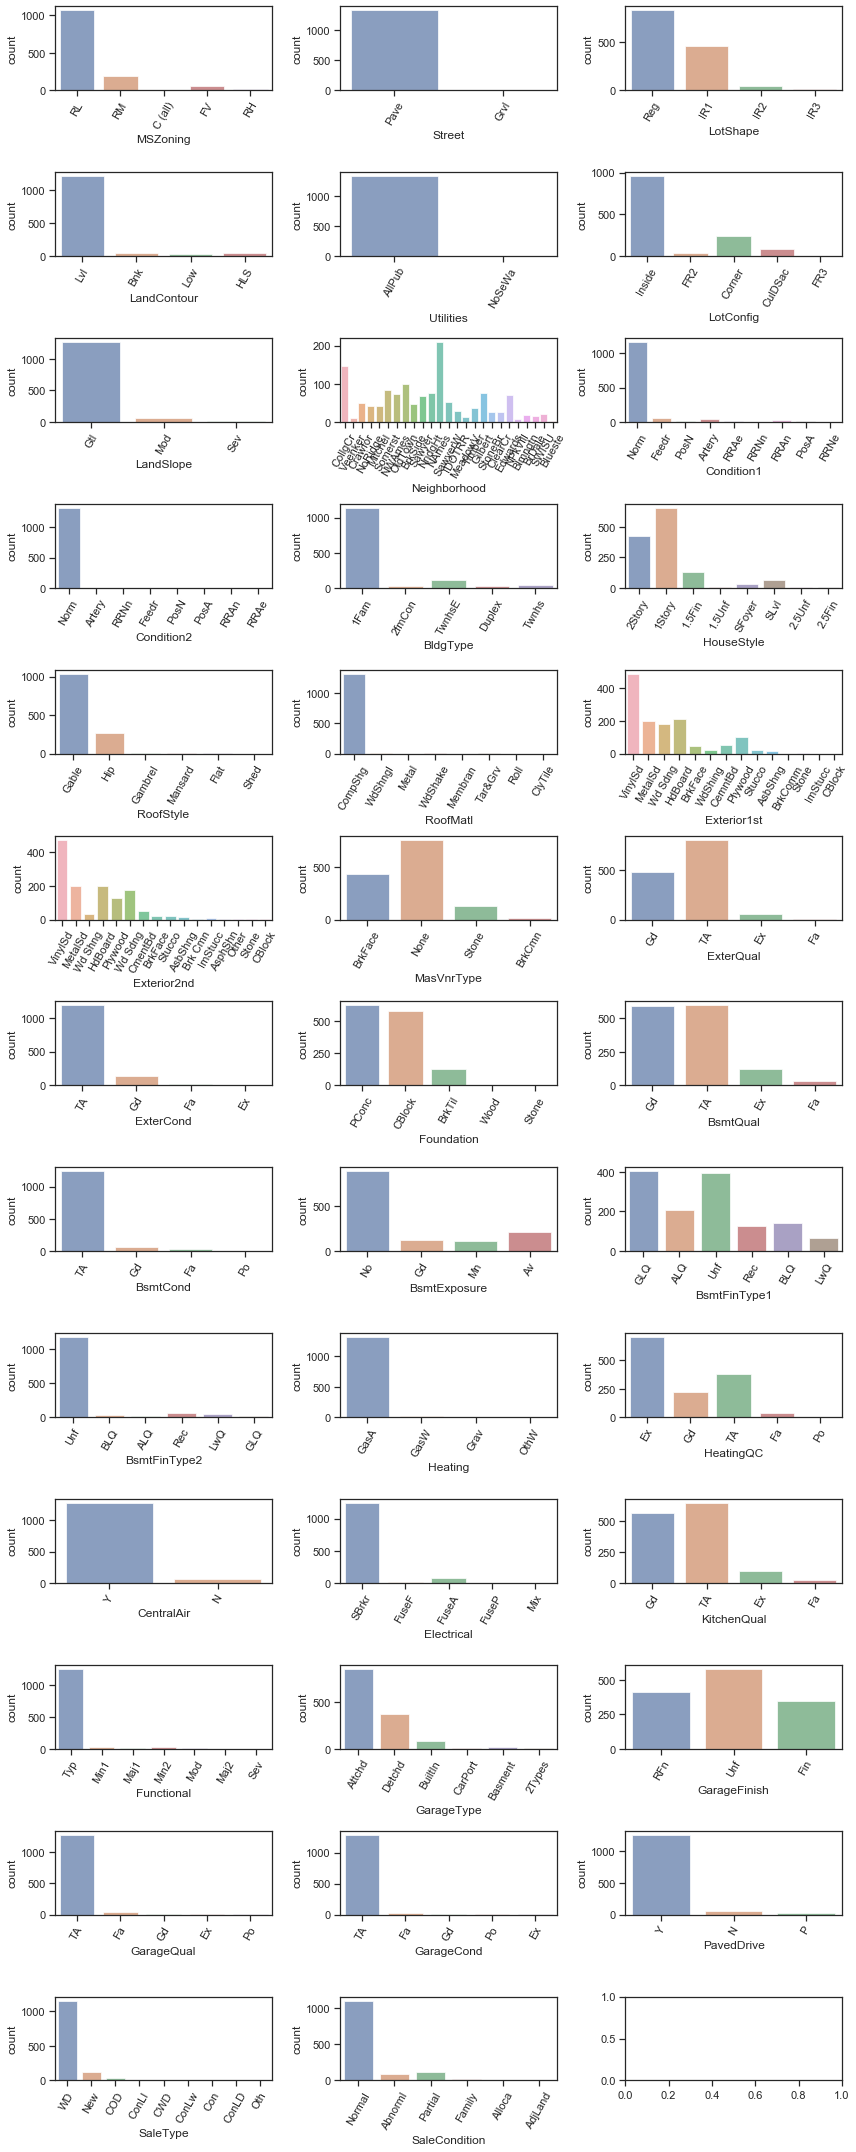

In [19]:
# df_cat['MSZoning'].value_counts().plot.bar()

fig, axes = plt.subplots(round(len(df_cat.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_cat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=60)
        sns.countplot(x=df_cat.columns[i], alpha=0.7, data=df_cat, ax=ax)

fig.tight_layout()

### Analyse relation between categorical features and target variable

Boxplots are a nice way to visialize the "correlation" between the classes of categorical features and the target variable

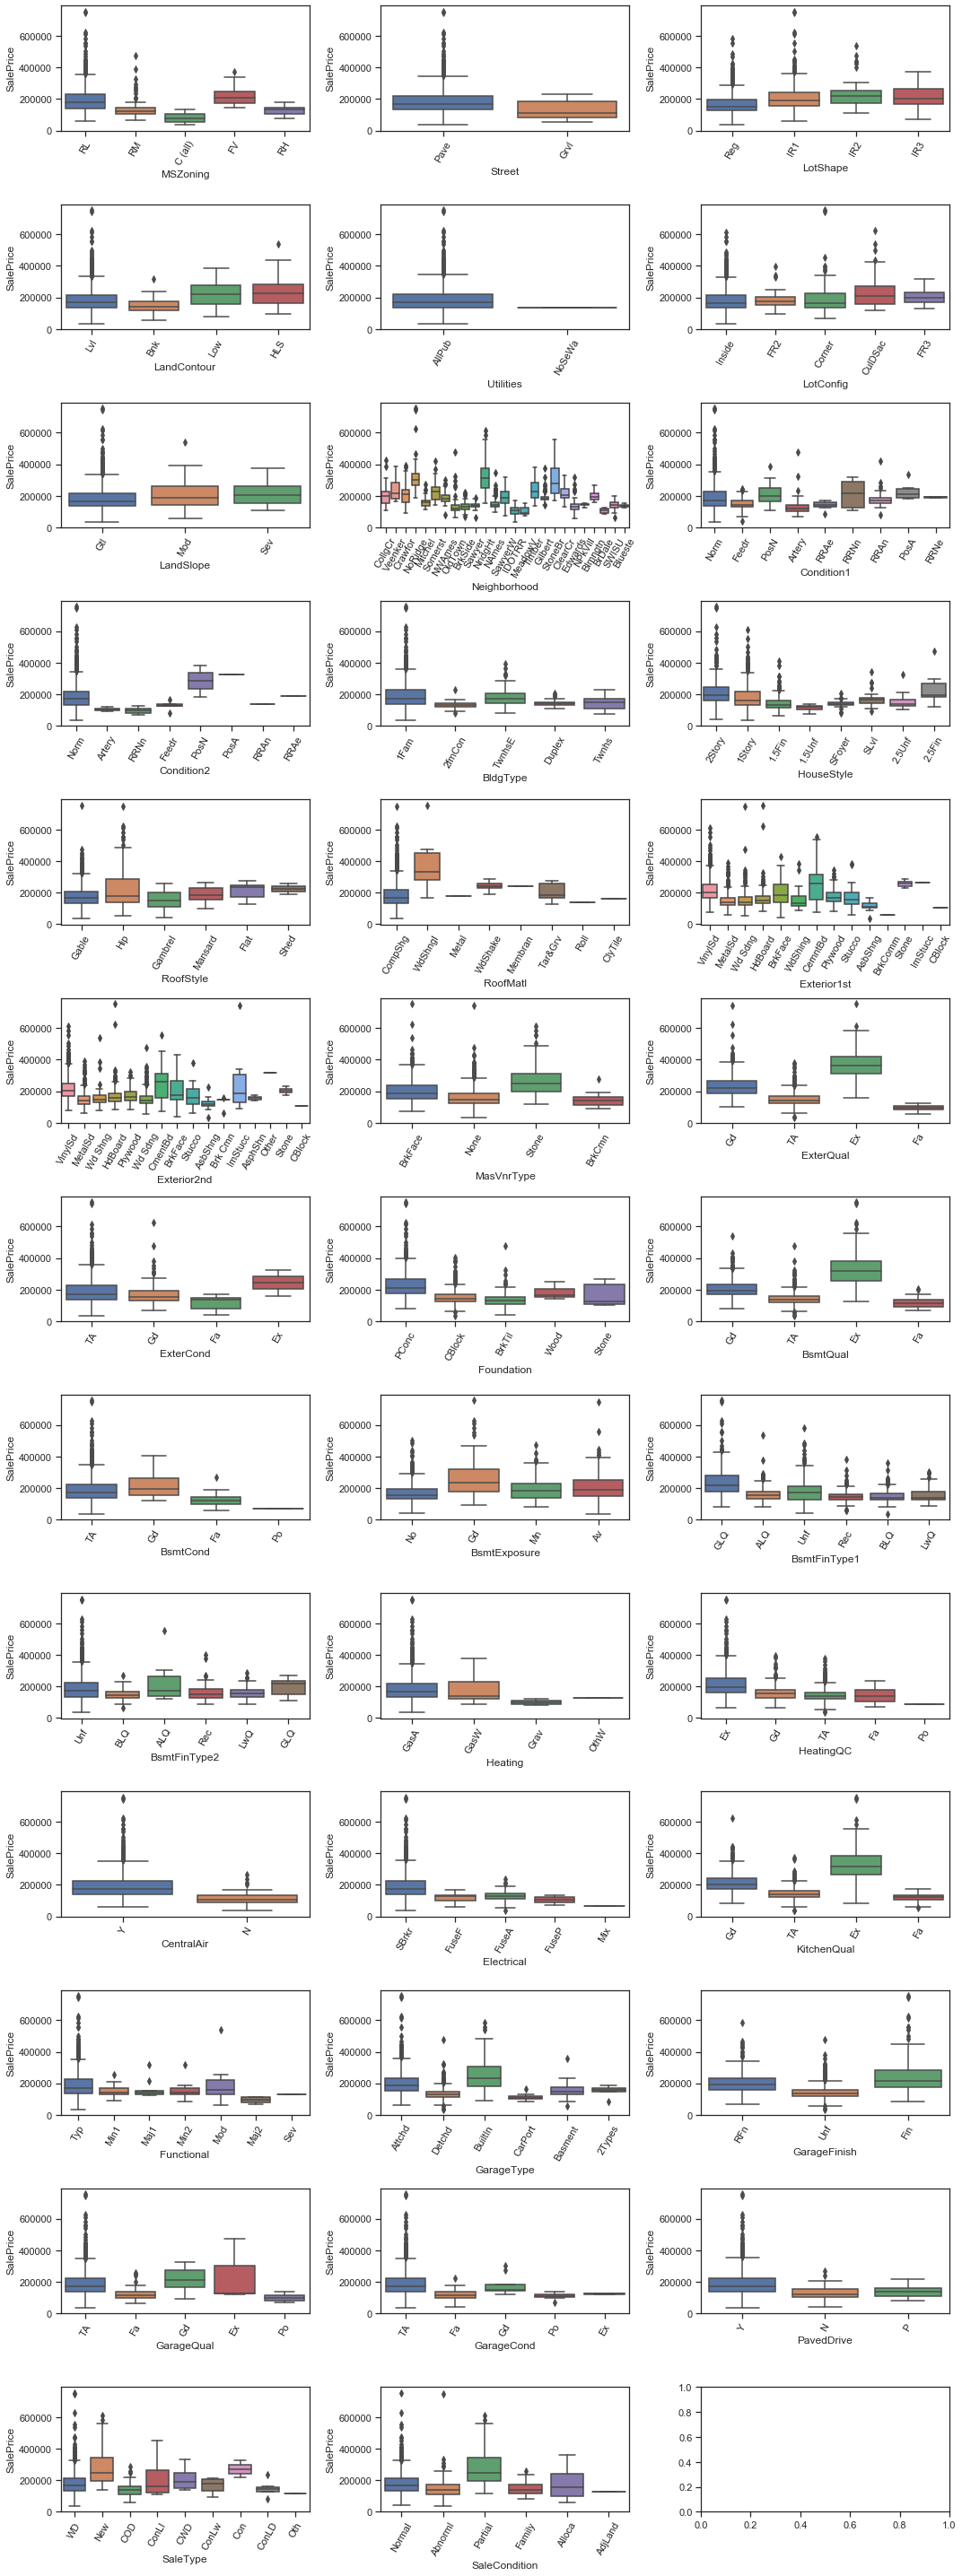

In [20]:
# df.boxplot('SalePrice', by='MSZoning')

fig, axes = plt.subplots(round(len(df_cat.columns) / 3), 3, figsize=(15, 40))
df_cat_with_target = pd.concat([df_cat, df['SalePrice']], axis=1)

for i, ax in enumerate(fig.axes):
    if i < len(df_cat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=60)
        sns.boxplot(x=df_cat.columns[i], y='SalePrice', data=df_cat_with_target, ax=ax)

fig.tight_layout()

## Machine Learning - House Price Prediction with Regression

In [21]:
for column in df_cat.columns:
    df_cat.loc[:, column] = df_cat[column].astype('category')
    df_cat.loc[:, column] = df_cat[column].cat.codes

c:\users\nicolas\workspace\ml\ml-workshop\ml-workshop-env\lib\site-packages\pandas\core\indexing.py:562: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
c:\users\nicolas\workspace\ml\ml-workshop\ml-workshop-env\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [22]:
df_all = pd.concat([df_num, df_cat], axis=1)
# df_all = df_num

# df_all = (df_all-df_all.mean())/df_all.std() # e.g KernelRidge doesn't work at all without standardization

x = df_all.drop('SalePrice', axis=1).values
y = df_all['SalePrice'].values

In [23]:
x.shape

(1338, 73)

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [25]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=30, n_estimators=100,random_state=0)
# model = KernelRidge(kernel='rbf')
# model = LinearRegression()
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [26]:
from sklearn.metrics import r2_score
r2_score(y_test, model.predict(x_test))

0.8119999978810679

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, model.predict(x_test))

952747965.8382623

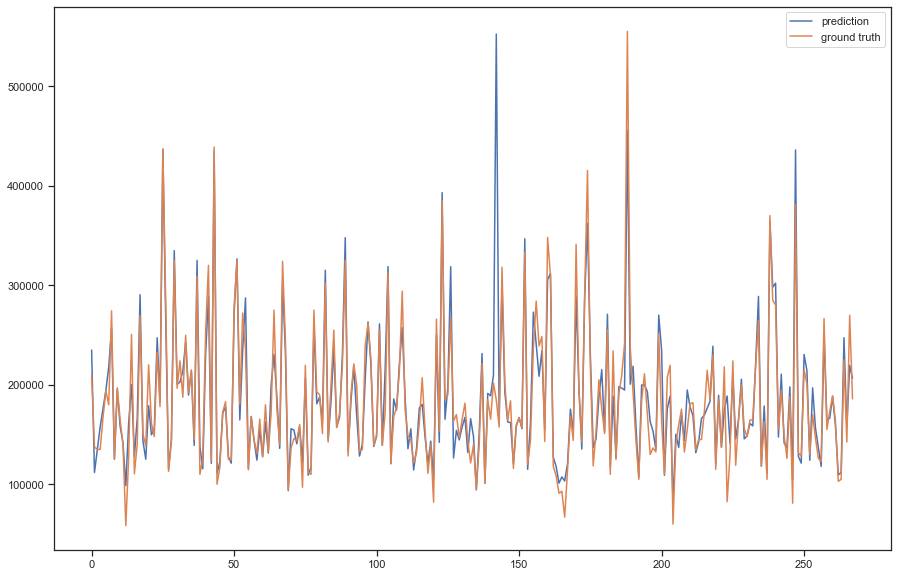

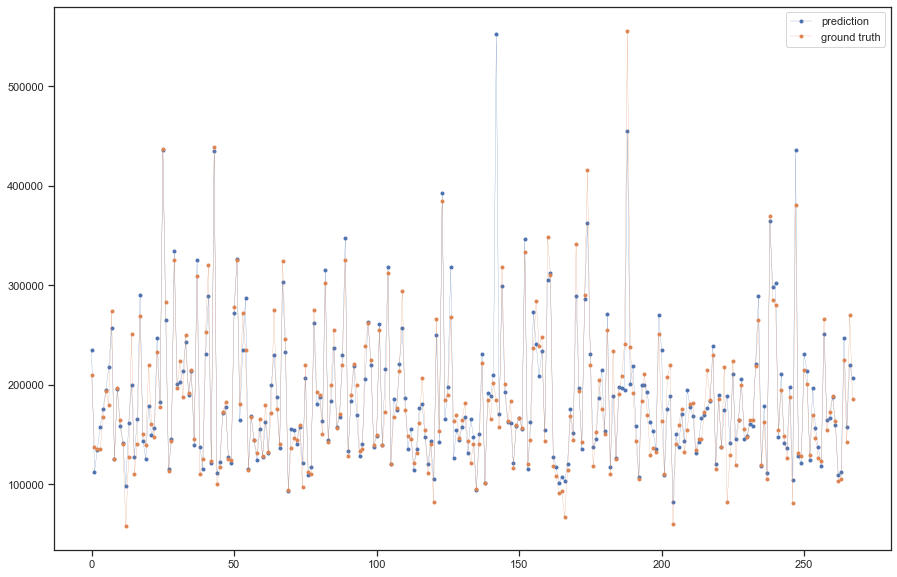

In [28]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(model.predict(x_test), label='prediction')
ax.plot(y_test, label='ground truth')
ax.legend()

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(model.predict(x_test), label='prediction', marker='.', lw=0.2)
ax.plot(y_test, label='ground truth', marker='.', lw=0.2)
ax.legend()